# Importing Libraries

In [1]:
from predictions.etl import ETL
from predictions.evaluate import Evaluate
from predictions.predict import Predict 
import os
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

from itertools import combinations
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import tensorflow as tf
import os
import random


random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()
os.environ['TF_DETERMINISTIC_OPS'] = '1'

In [2]:
def reset_seeds():
   np.random.seed(SEED) 
   random.seed(SEED)
   tf.random.set_seed(SEED)
   tf.keras.utils.set_random_seed(1)
   tf.config.experimental.enable_op_determinism()
   os.environ['TF_DETERMINISTIC_OPS'] = '1'
   os.environ['PYTHONHASHSEED'] = str(SEED)

reset_seeds() 

# LSTM Model:

In [3]:
def build_lstm(input_shape):
    reset_seeds() 
    model = Sequential()  
    model.add(LSTM(256, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(256))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    
    return model

## 2015/External.csv | Features : HashRate

In [4]:
etl = ETL("../data/timeseries/2015/external.csv", features=['PriceUSD','HashRate'])

In [5]:
model = build_lstm(etl.test_x.shape[1:])
model.compile(optimizer='adam', loss='mean_absolute_error')
model.fit(etl.train_x,
            etl.train_y,
            epochs=100,
            batch_size=8,
            validation_split=0.2,
            shuffle=False
        )



Epoch 1/100

4/4 [==============================] - 4s 322ms/step - loss: 0.1371 - val_loss: 0.1039
Epoch 2/100
4/4 [==============================] - 0s 23ms/step - loss: 0.0924 - val_loss: 0.0163
Epoch 3/100
4/4 [==============================] - 0s 21ms/step - loss: 0.0806 - val_loss: 0.0653
Epoch 4/100
4/4 [==============================] - 0s 22ms/step - loss: 0.0646 - val_loss: 0.0275
Epoch 5/100
4/4 [==============================] - 0s 32ms/step - loss: 0.0589 - val_loss: 0.0660
Epoch 6/100
4/4 [==============================] - 0s 31ms/step - loss: 0.0528 - val_loss: 0.0227
Epoch 7/100
4/4 [==============================] - 0s 42ms/step - loss: 0.0595 - val_loss: 0.0227
Epoch 8/100
4/4 [==============================] - 0s 26ms/step - loss: 0.0358 - val_loss: 0.0550
Epoch 9/100
4/4 [==============================] - 0s 27ms/step - loss: 0.0669 - val_loss: 0.0719
Epoch 10/100
4/4 [==============================] - 0s 29ms/step - loss: 0.0512 - val_loss: 0.0169
Epoch 11/100
4/

In [6]:
predict = Predict(model, etl.test_x, etl.test_y)
evaluate_lstm_2015_external = Evaluate(etl.inverse_scale(etl.test_y), etl.inverse_scale(predict.predictions))

1/1 [==============================] - 1s 753ms/step


In [7]:
evaluate_lstm_2015_external.print_scores()

| Metric         |       Value |
|----------------|-------------|
| MSE            | 232.01      |
| RMSE           |  15.2319    |
| MAE            |  12.7427    |
| R2             |   0.928554  |
| MAPE           |   0.0359043 |
| Variance Ratio |   0.111589  |


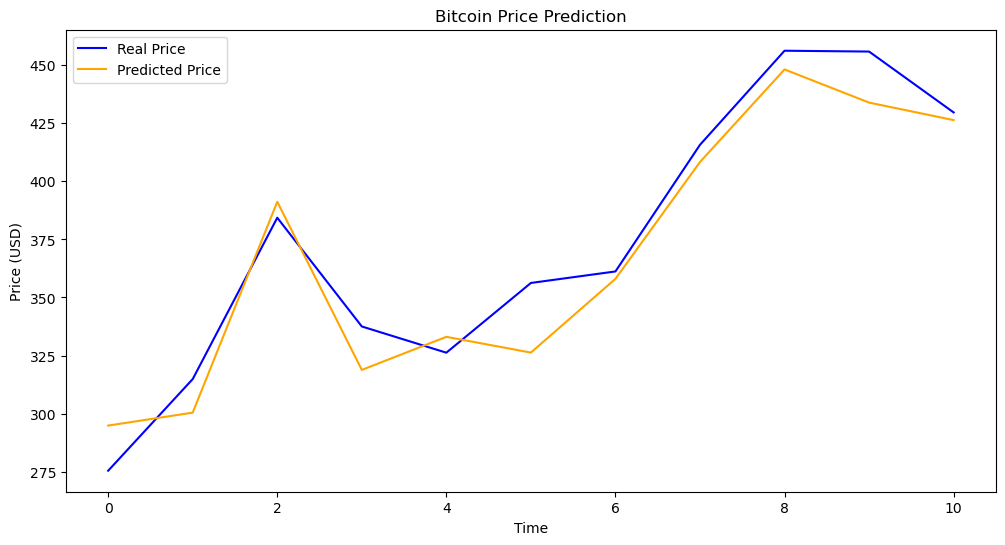

In [8]:
evaluate_lstm_2015_external.plot_lines()

In [9]:
evaluate_lstm_2015_external.print_comparison()

|   Actual |   Predicted |
|----------|-------------|
|  275.415 |     294.852 |
|  314.879 |     300.429 |
|  384.341 |     391.211 |
|  337.523 |     318.822 |
|  326.232 |     333.054 |
|  356.255 |     326.28  |
|  361.21  |     358.031 |
|  415.73  |     408.331 |
|  456.24  |     448.182 |
|  455.879 |     433.905 |
|  429.677 |     426.373 |


## Task1/external.csv | Features : HashRate

In [73]:
etl_task1 = ETL("../data/timeseries/task1/external.csv", features=['PriceUSD','HashRate'], timestep=5)

In [89]:
model = build_lstm(etl_task1.test_x.shape[1:])
model.compile(optimizer='adam', loss='mean_absolute_error')
model.fit(etl_task1.train_x,
            etl_task1.train_y,
            epochs=100,
            batch_size=8,
            validation_split=0.2,
            shuffle=False
        )

Epoch 1/100
7/7 [==============================] - 4s 143ms/step - loss: 0.1022 - val_loss: 0.0368
Epoch 2/100
7/7 [==============================] - 0s 17ms/step - loss: 0.0651 - val_loss: 0.0340
Epoch 3/100
7/7 [==============================] - 0s 17ms/step - loss: 0.0300 - val_loss: 0.0223
Epoch 4/100
7/7 [==============================] - 0s 17ms/step - loss: 0.0234 - val_loss: 0.0191
Epoch 5/100
7/7 [==============================] - 0s 17ms/step - loss: 0.0235 - val_loss: 0.0231
Epoch 6/100
7/7 [==============================] - 0s 16ms/step - loss: 0.0236 - val_loss: 0.0301
Epoch 7/100
7/7 [==============================] - 0s 16ms/step - loss: 0.0309 - val_loss: 0.0165
Epoch 8/100
7/7 [==============================] - 0s 17ms/step - loss: 0.0205 - val_loss: 0.0164
Epoch 9/100
7/7 [==============================] - 0s 17ms/step - loss: 0.0274 - val_loss: 0.0284
Epoch 10/100
7/7 [==============================] - 0s 21ms/step - loss: 0.0398 - val_loss: 0.0299
Epoch 11/100
7/7 [

In [90]:
predict = Predict(model, etl_task1.test_x, etl_task1.test_y)
evaluate_lstm_task1_external = Evaluate(etl_task1.inverse_scale(etl_task1.test_y), etl_task1.inverse_scale(predict.predictions))

1/1 [==============================] - 1s 780ms/step


| Metric         |       Value |
|----------------|-------------|
| MSE            | 809.805     |
| RMSE           |  28.4571    |
| MAE            |  19.8018    |
| R2             |   0.997994  |
| MAPE           |   0.025248  |
| Variance Ratio |   0.0294225 |


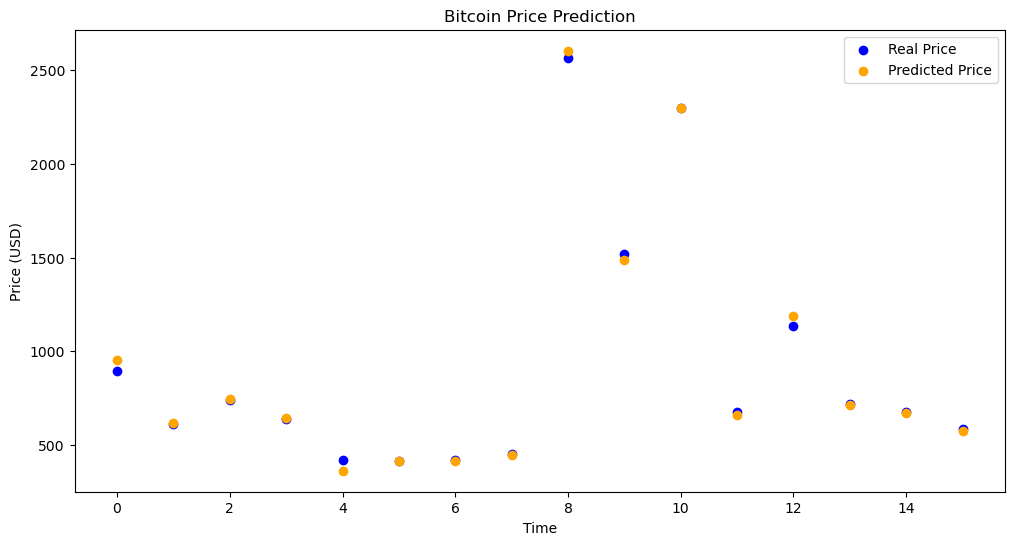

In [91]:
evaluate_lstm_task1_external.print_scores()
evaluate_lstm_task1_external.plot_points()

In [92]:

evaluate_lstm_task1_external.print_comparison()

|   Actual |   Predicted |
|----------|-------------|
|  895.69  |     953.388 |
|  612.148 |     617.355 |
|  742.204 |     747.069 |
|  638.586 |     645.682 |
|  420.623 |     363.249 |
|  412.778 |     414.181 |
|  421.907 |     413.902 |
|  450.55  |     447.577 |
| 2562.79  |    2602.69  |
| 1519.41  |    1486.06  |
| 2299.43  |    2294.82  |
|  675.11  |     657.771 |
| 1135.81  |    1190.15  |
|  721.502 |     713.273 |
|  677.651 |     672.558 |
|  583.098 |     573.744 |


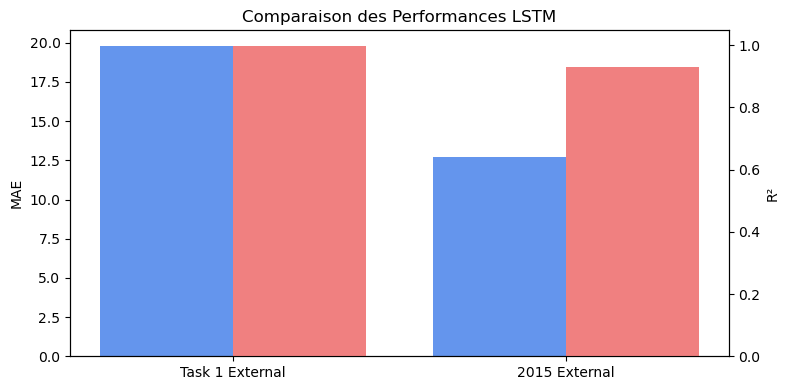

In [93]:
models = ['Task 1 External', '2015 External']
mae_values = [evaluate_lstm_task1_external.mae, evaluate_lstm_2015_external.mae]
r2_values = [evaluate_lstm_task1_external.r2, evaluate_lstm_2015_external.r2]

colors = ['cornflowerblue', 'lightcoral']
fig, ax1 = plt.subplots(figsize=(8, 4))
ax1.bar(models, mae_values, color=colors[0], label='MAE', width=-0.4, align='edge')
ax1.set_ylabel('MAE')
ax2 = ax1.twinx()
ax2.bar(models, r2_values, color=colors[1], label='R²', width=0.4, align='edge')
ax2.set_ylabel('R²')
ax1.set_title('Comparaison des Performances LSTM')
fig.tight_layout()
plt.show()


## 2015/merged.csv | Features : HashRate, nb_transactions

In [27]:
etl_2015_merged = ETL("../data/timeseries/2015/merged.csv", features=['PriceUSD','HashRate'])

In [29]:
model = build_lstm(etl_2015_merged.test_x.shape[1:])
model.compile(optimizer='adam', loss='mean_absolute_error')
model.fit(etl_2015_merged.train_x,
            etl_2015_merged.train_y,
            epochs=100,
            batch_size=8,
            validation_split=0.2,
            shuffle=False
        )

Epoch 1/100
4/4 [==============================] - 4s 317ms/step - loss: 0.1322 - val_loss: 0.1452
Epoch 2/100
4/4 [==============================] - 0s 25ms/step - loss: 0.1106 - val_loss: 0.0307
Epoch 3/100
4/4 [==============================] - 0s 25ms/step - loss: 0.0785 - val_loss: 0.0544
Epoch 4/100
4/4 [==============================] - 0s 24ms/step - loss: 0.0725 - val_loss: 0.0329
Epoch 5/100
4/4 [==============================] - 0s 22ms/step - loss: 0.0479 - val_loss: 0.0859
Epoch 6/100
4/4 [==============================] - 0s 21ms/step - loss: 0.0470 - val_loss: 0.0161
Epoch 7/100
4/4 [==============================] - 0s 23ms/step - loss: 0.0510 - val_loss: 0.0224
Epoch 8/100
4/4 [==============================] - 0s 22ms/step - loss: 0.0308 - val_loss: 0.0878
Epoch 9/100
4/4 [==============================] - 0s 23ms/step - loss: 0.0570 - val_loss: 0.0757
Epoch 10/100
4/4 [==============================] - 0s 24ms/step - loss: 0.0464 - val_loss: 0.0143
Epoch 11/100
4/4 [

In [30]:
predict = Predict(model, etl_2015_merged.test_x, etl_2015_merged.test_y)
evaluate_lstm_2015_merged = Evaluate(etl_2015_merged.inverse_scale(etl_2015_merged.test_y), etl_2015_merged.inverse_scale(predict.predictions))

1/1 [==============================] - 1s 751ms/step


| Metric         |        Value |
|----------------|--------------|
| MSE            | 102.869      |
| RMSE           |  10.1424     |
| MAE            |   8.59918    |
| R2             |   0.968322   |
| MAPE           |   0.0235287  |
| Variance Ratio |   0.00866637 |
|   Actual |   Predicted |
|----------|-------------|
|  275.415 |     277.995 |
|  314.879 |     305.31  |
|  384.341 |     388.617 |
|  337.523 |     328.421 |
|  326.232 |     339.868 |
|  356.255 |     335.237 |
|  361.21  |     363.834 |
|  415.73  |     407.711 |
|  456.24  |     453.771 |
|  455.879 |     445.686 |
|  429.677 |     440.781 |


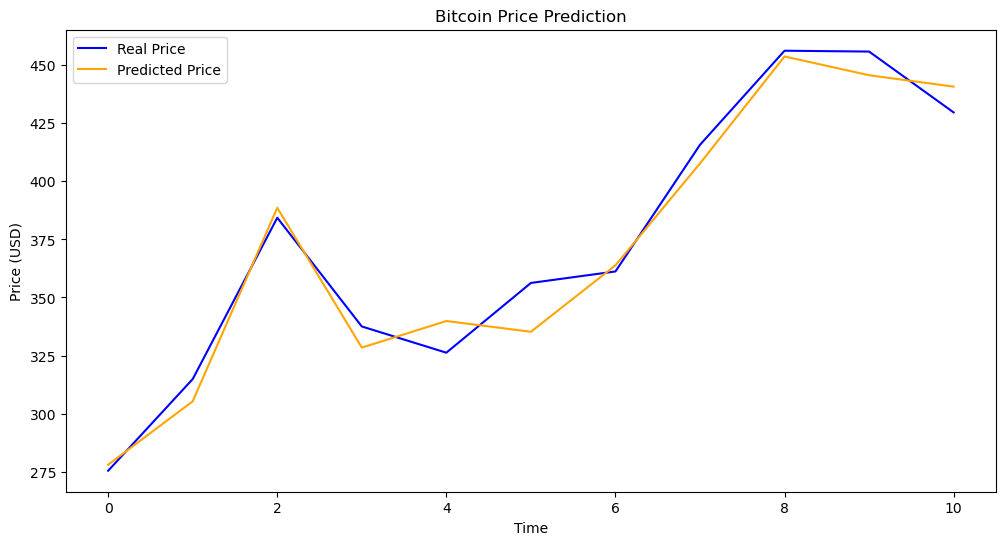

In [32]:
evaluate_lstm_2015_merged.print_scores()
evaluate_lstm_2015_merged.print_comparison()
evaluate_lstm_2015_merged.plot_lines()

## task1/merged.csv | Features : HashRate, nb_transactions

In [123]:
etl_task1_merged = ETL("../data/timeseries/task1/merged.csv", features=['PriceUSD','HashRate','total_received','total_sent_satoshi','nb_transactions','mean_feeUSD'],timestep=5)

In [127]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Préparez vos données
X = etl_task1_merged.df[['HashRate','total_received','total_sent_satoshi','nb_transactions','mean_feeUSD']]  # Features
y = etl_task1_merged.df['PriceUSD']  # Target

# Divisez vos données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînez un modèle RandomForest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Obtenez l'importance des features
importances = model.feature_importances_

# Affichez l'importance de chaque feature
for i in range(len(importances)):
    print(f"{X.columns[i]}: {importances[i]}")


AttributeError: 'ETL' object has no attribute 'data'

In [124]:
model = build_lstm(etl_task1_merged.test_x.shape[1:])
model.compile(optimizer='adam', loss='mean_absolute_error')
model.fit(etl_task1_merged.train_x,
            etl_task1_merged.train_y,
            epochs=100,
            batch_size=8,
            validation_split=0.2,
            shuffle=False
        )

Epoch 1/100
7/7 [==============================] - 5s 149ms/step - loss: 0.1014 - val_loss: 0.0559
Epoch 2/100
7/7 [==============================] - 0s 17ms/step - loss: 0.0804 - val_loss: 0.0380
Epoch 3/100
7/7 [==============================] - 0s 18ms/step - loss: 0.0357 - val_loss: 0.0289
Epoch 4/100
7/7 [==============================] - 0s 16ms/step - loss: 0.0248 - val_loss: 0.0248
Epoch 5/100
7/7 [==============================] - 0s 17ms/step - loss: 0.0279 - val_loss: 0.0232
Epoch 6/100
7/7 [==============================] - 0s 16ms/step - loss: 0.0245 - val_loss: 0.0246
Epoch 7/100
7/7 [==============================] - 0s 16ms/step - loss: 0.0291 - val_loss: 0.0207
Epoch 8/100
7/7 [==============================] - 0s 17ms/step - loss: 0.0246 - val_loss: 0.0296
Epoch 9/100
7/7 [==============================] - 0s 18ms/step - loss: 0.0339 - val_loss: 0.0233
Epoch 10/100
7/7 [==============================] - 0s 16ms/step - loss: 0.0328 - val_loss: 0.0233
Epoch 11/100
7/7 [

In [125]:
predict = Predict(model, etl_task1_merged.test_x, etl_task1_merged.test_y)
evaluate_lstm_task1_merged = Evaluate(etl_task1_merged.inverse_scale(etl_task1_merged.test_y), etl_task1_merged.inverse_scale(predict.predictions))

1/1 [==============================] - 1s 821ms/step


| Metric         |        Value |
|----------------|--------------|
| MSE            | 2674.36      |
| RMSE           |   51.7143    |
| MAE            |   43.7432    |
| R2             |    0.993376  |
| MAPE           |    0.0608884 |
| Variance Ratio |    0.0573694 |
|   Actual |   Predicted |
|----------|-------------|
|  895.69  |     966.57  |
|  612.148 |     668.125 |
|  742.204 |     799.073 |
|  638.586 |     644.773 |
|  420.623 |     391.575 |
|  412.778 |     467.125 |
|  421.907 |     468.643 |
|  450.55  |     525.873 |
| 2562.79  |    2468.55  |
| 1519.41  |    1503.36  |
| 2299.43  |    2343.95  |
|  675.11  |     685.458 |
| 1135.81  |    1220.57  |
|  721.502 |     752.258 |
|  677.651 |     671.28  |
|  583.098 |     600.575 |


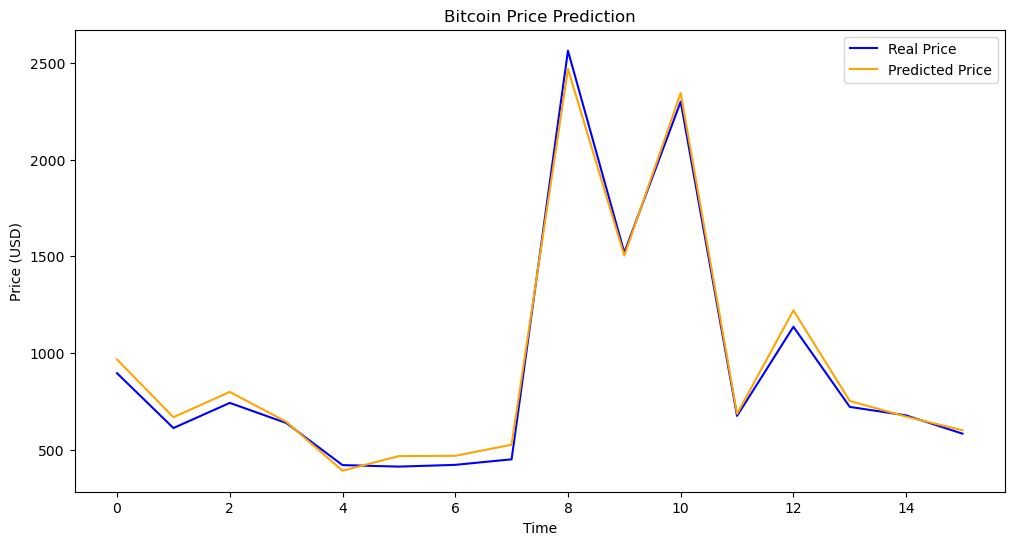

In [126]:
evaluate_lstm_task1_merged.print_scores()
evaluate_lstm_task1_merged.print_comparison()
evaluate_lstm_task1_merged.plot_lines()